# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?


## Part One: Understanding the Background and Data


article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

The article gives us a overview of how Fandango was rating the movies slightly higher than what the watchers rated to make them sell. 


### The Data

The data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

# -----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug 24, 2015.

# Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb



#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part One: Exploring Fandango Displayed Scores versus True User Ratings

Exploring the Fandango ratings to see if our analysis agrees with the article's conclusion.


In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [6]:
fandango[['RATING','VOTES','STARS']]

,RATING,VOTES,STARS
0,3.9,34846,4.0
1,4.5,34390,4.5
2,4.8,34085,5.0
3,4.8,33538,5.0
4,4.5,15749,4.5
...,...,...,...
499,0.0,0,0.0
500,0.0,0,0.0
501,0.0,0,0.0
502,0.0,0,0.0


**Exploring the relationship between popularity of a film and its rating**

<Axes: xlabel='RATING', ylabel='VOTES'>

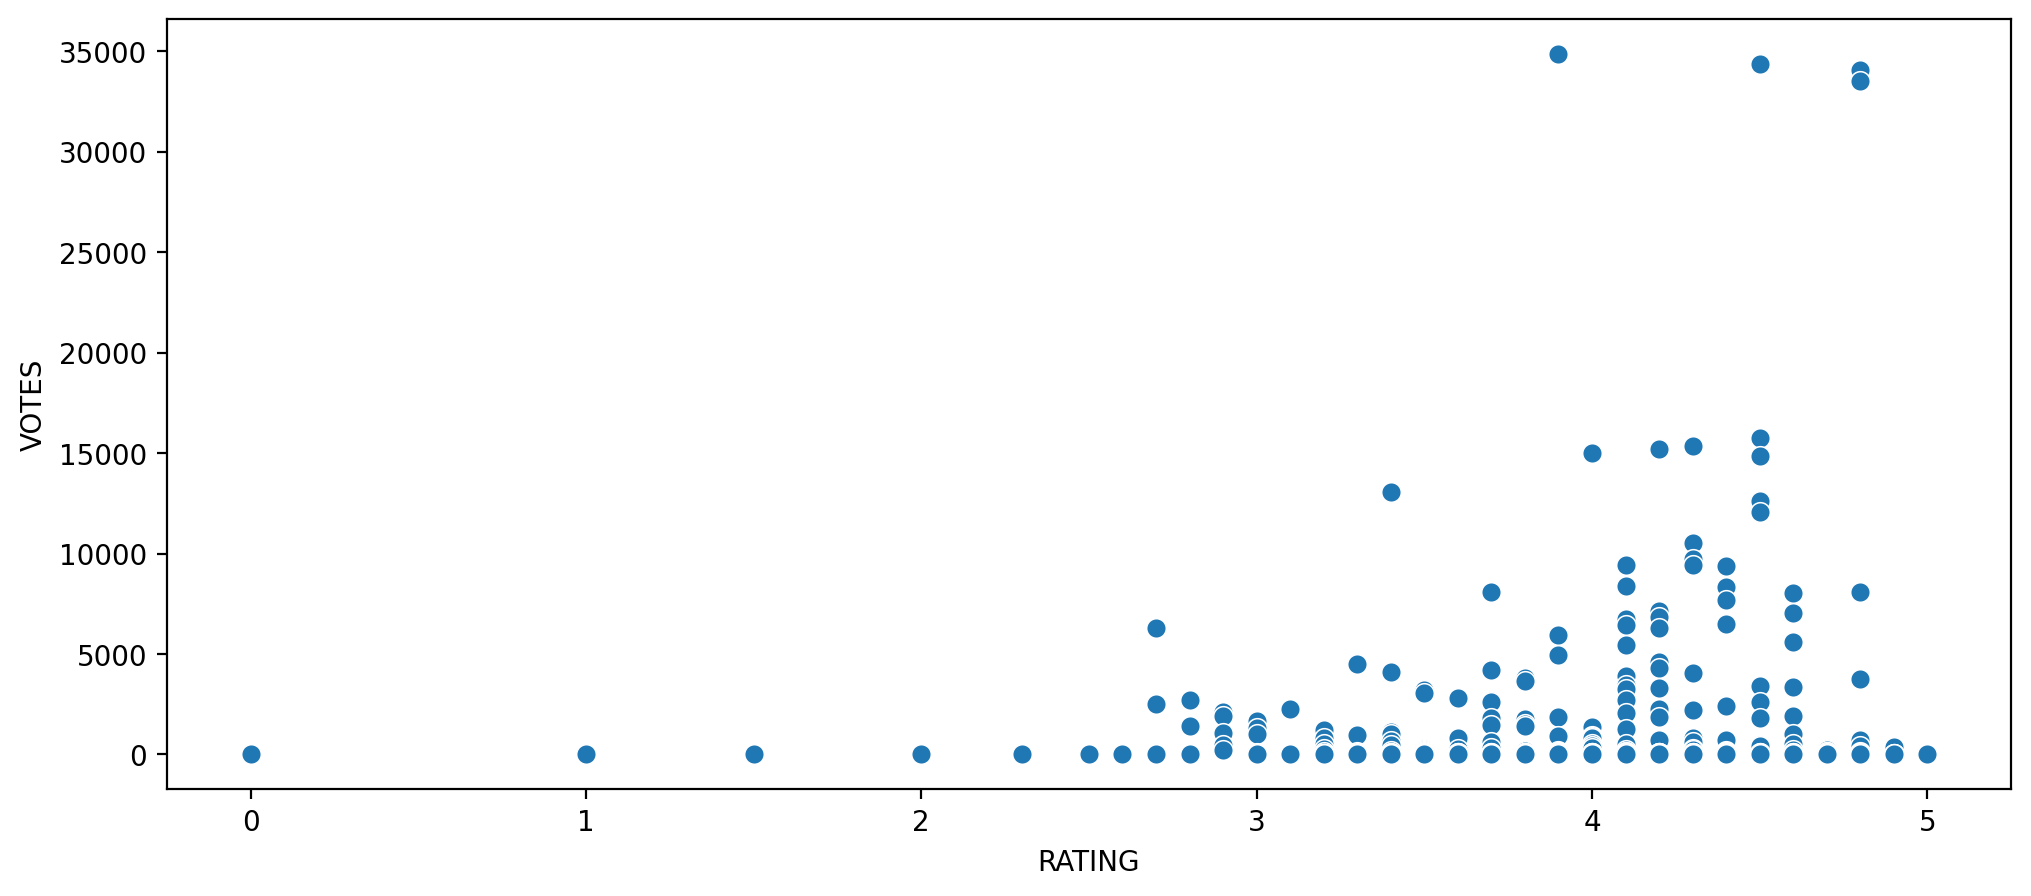

In [7]:
plt.figure(figsize=(11.9,5),dpi=200)
sns.scatterplot(x='RATING',y='VOTES',data=fandango,s=50)

In [8]:
fandango.corr()

/var/folders/2j/l_xbmzz11mngr8tgsh_ww_tr0000gn/T/ipykernel_19109/1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Creating a new column that strips the year from the title strings and set this new column as YEAR**

In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].strip(')'))
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [10]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Visualizing the count of movies per year with a plot:**

<Axes: xlabel='YEAR', ylabel='count'>

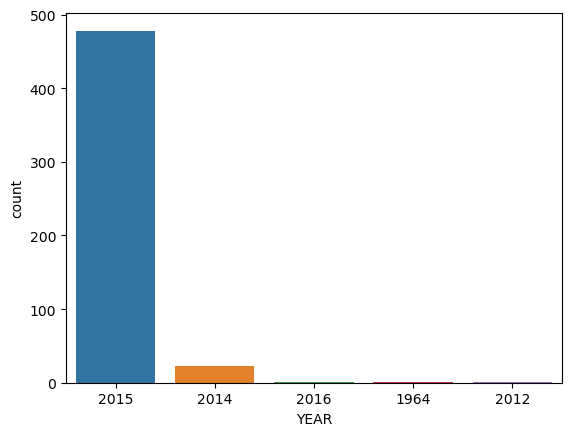

In [11]:
sns.countplot(data=fandango,x='YEAR')

**10 movies with the highest number of votes**

In [12]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Number of movies with zero votes**

In [25]:
no_votes=fandango['VOTES']==0
no_votes.sum()

69

**Removing the movies with zero votes because there won't be any contribution from this data for the analysis**

In [13]:
fan_reviewed = fandango[fandango['VOTES']>0]

**Creating a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING)**

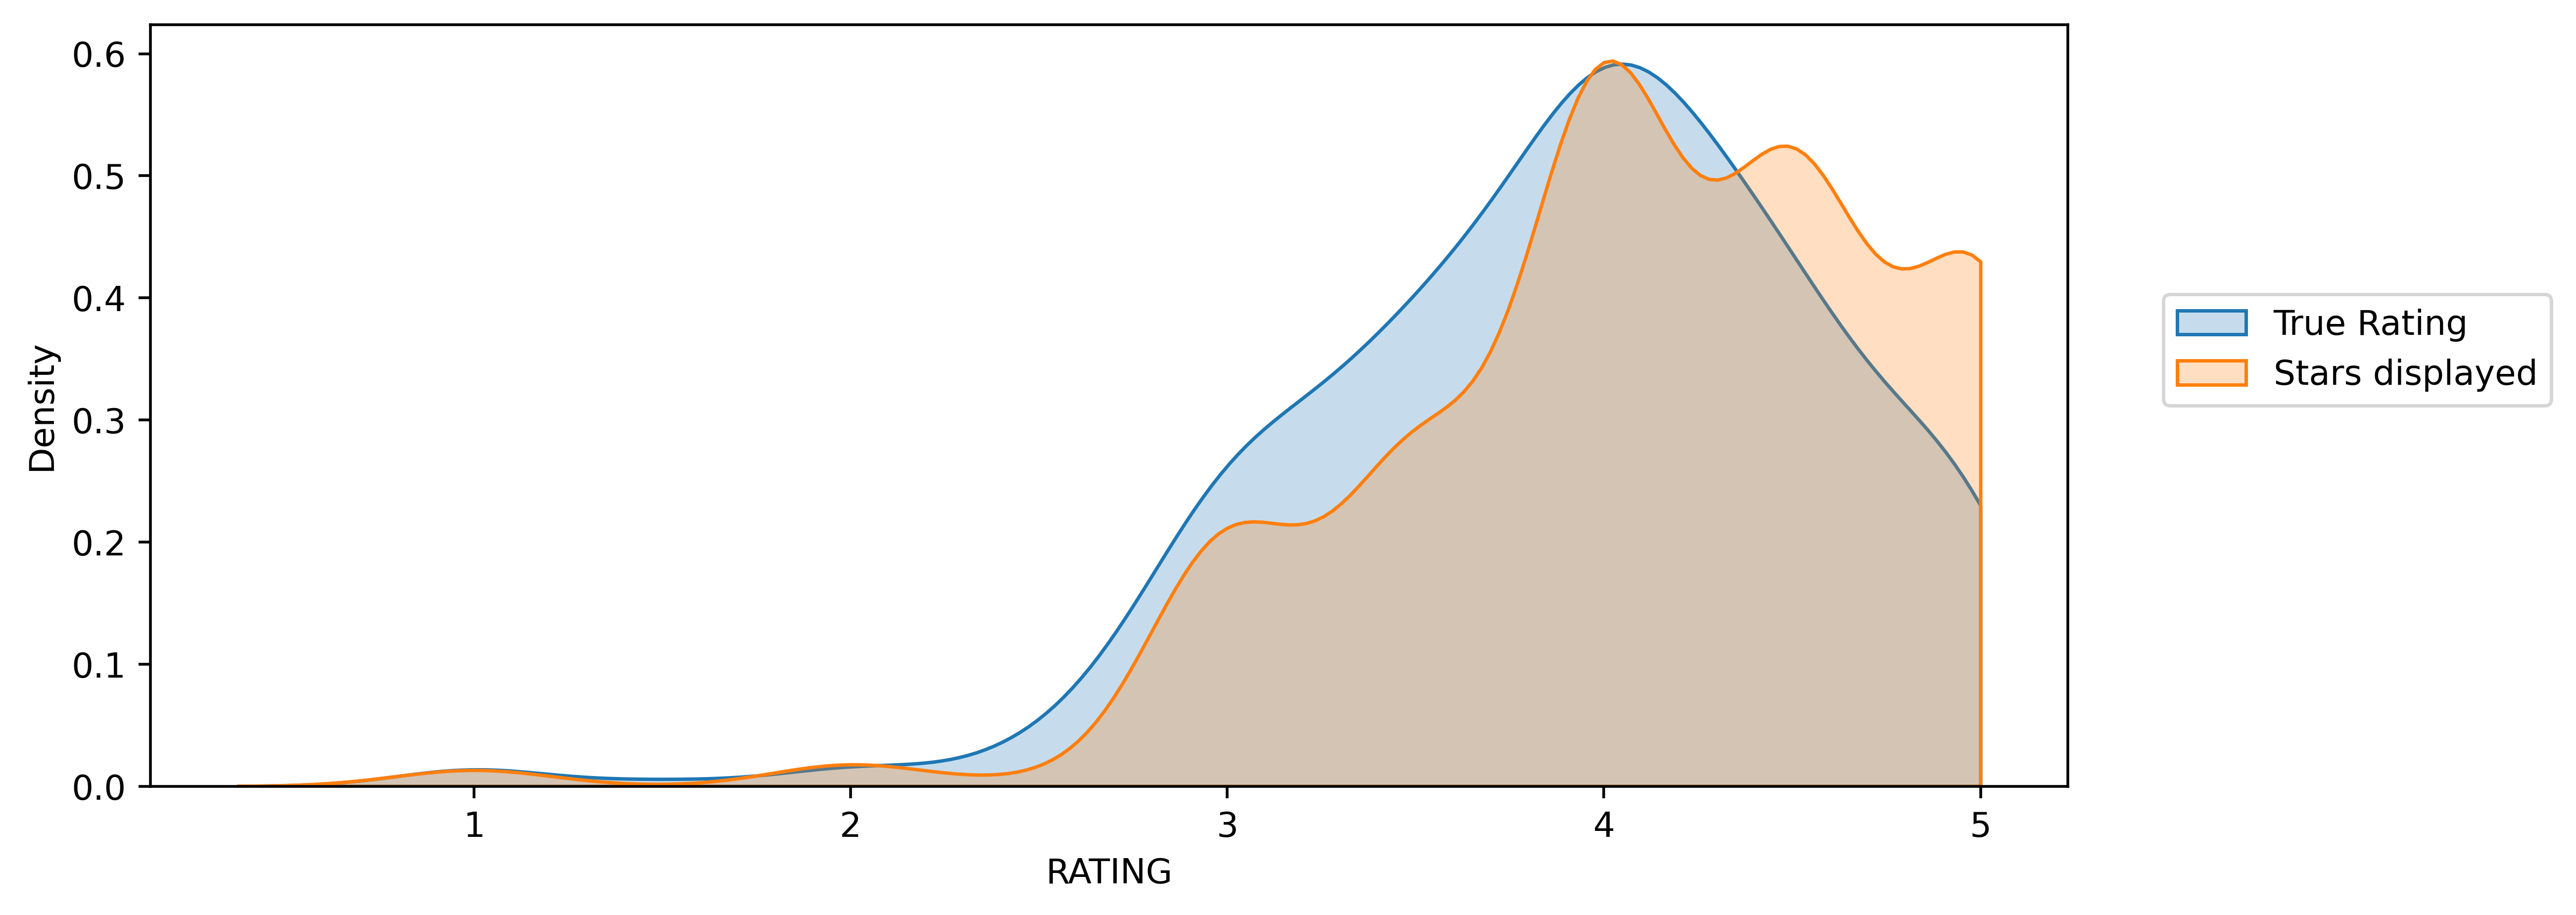

In [14]:
plt.figure(figsize=(10,4),dpi=500)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=(0,5),fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=(0,5),fill=True,label='Stars displayed')
plt.legend(loc=(1.05,0.5))

**Creating a new column of the difference between STARS displayed versus true RATING and rounding it to the nearest decimal**

In [15]:
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS_DIFF'].round(2)

/var/folders/2j/l_xbmzz11mngr8tgsh_ww_tr0000gn/T/ipykernel_19109/1252761658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']
/var/folders/2j/l_xbmzz11mngr8tgsh_ww_tr0000gn/T/ipykernel_19109/1252761658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=fan_reviewed['STARS_DIFF'].round(2)


In [16]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Plotting a count plot to display the number of times a certain difference occurs:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

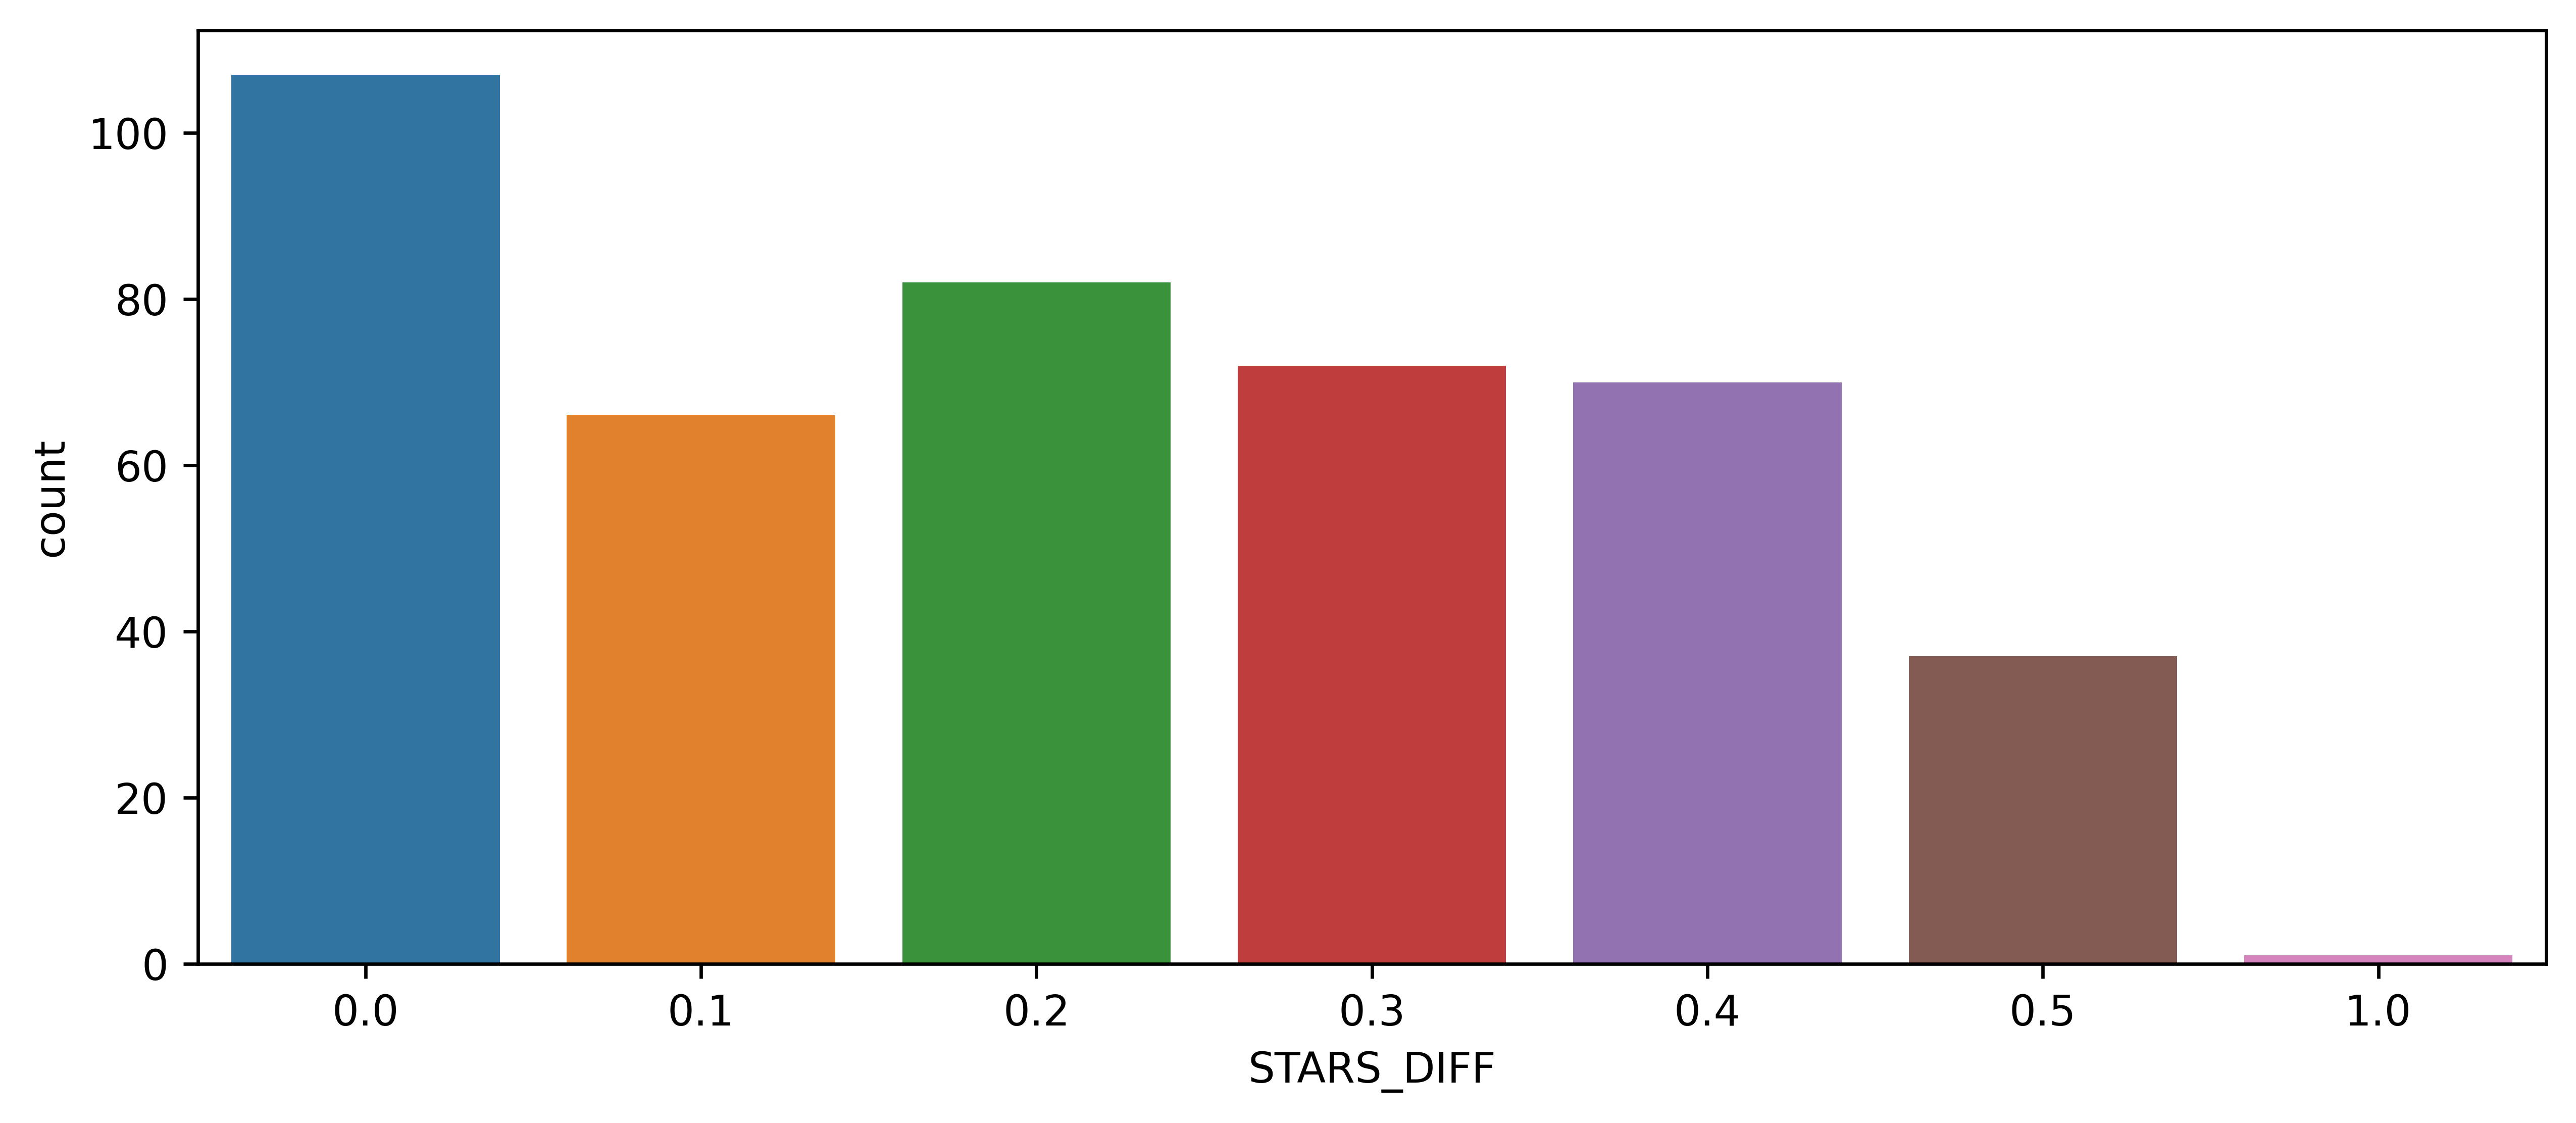

In [17]:
plt.figure(figsize=(10,4),dpi=600)
sns.countplot(data=fan_reviewed,x='STARS_DIFF')

**Checking the only the movie that had a one star difference between the displayed STARS and true RATING**

In [18]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparing the Fandango Ratings to Other Sites

In [19]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [20]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [22]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's start with Rotten Tomatoes. Rotten Tomatoes has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

(0.0, 100.0)

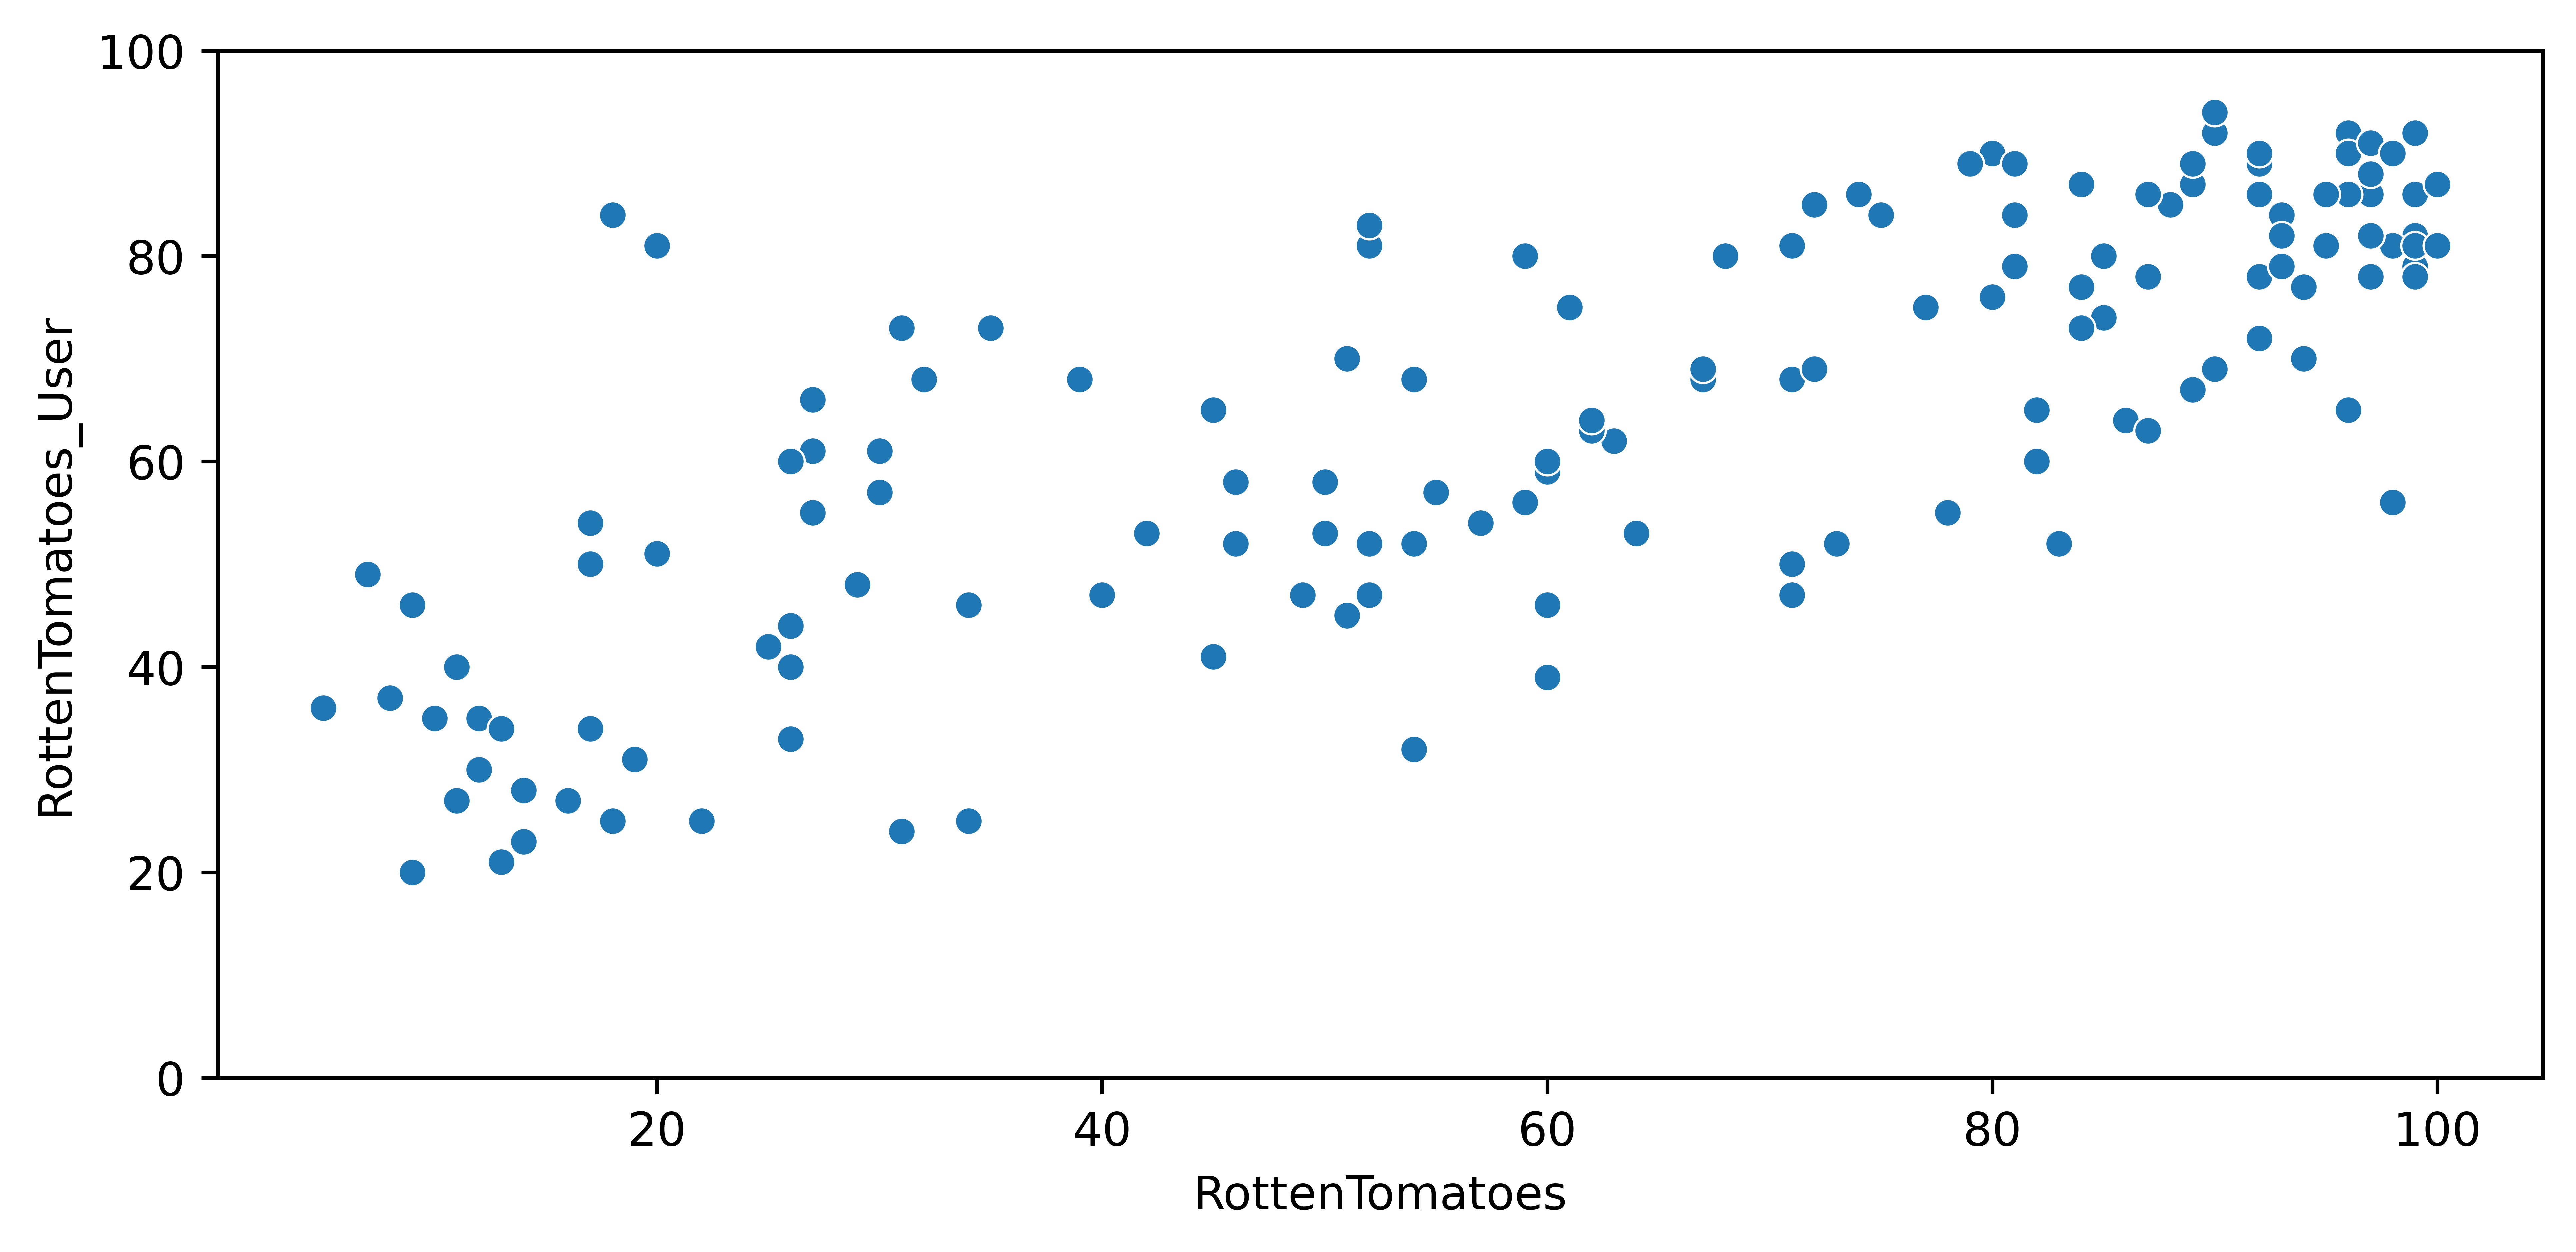

In [23]:
plt.figure(figsize=(9,4),dpi=1000)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)

**Quantifying this difference by comparing the critics ratings and the RT User ratings. Calculating this with RottenTomatoes-RottenTomatoes_User.**

**Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.**



In [24]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [25]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


**Plotting the distribution of the differences between RT Critics Score and RT User Score.**

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

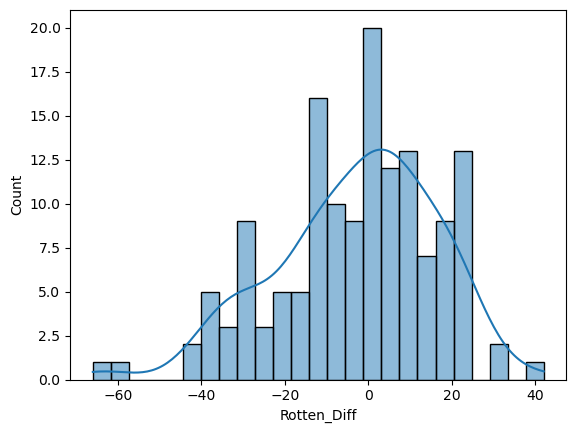

In [26]:
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)

**Creating a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

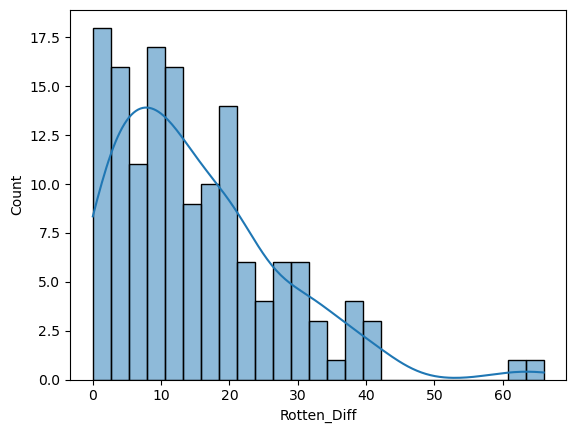

In [27]:
sns.histplot(x=all_sites['Rotten_Diff'].abs(),bins=25,kde=True)

**The top 5 movies users rated higher than critics on average:**

In [28]:
all_sites[['FILM','Rotten_Diff']].nsmallest(5,'Rotten_Diff')

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Top 5 movies critics scores higher than users on average.**

In [29]:
all_sites[['FILM','Rotten_Diff']].nlargest(5,'Rotten_Diff')

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


In [30]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Plotting the scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 10.0)

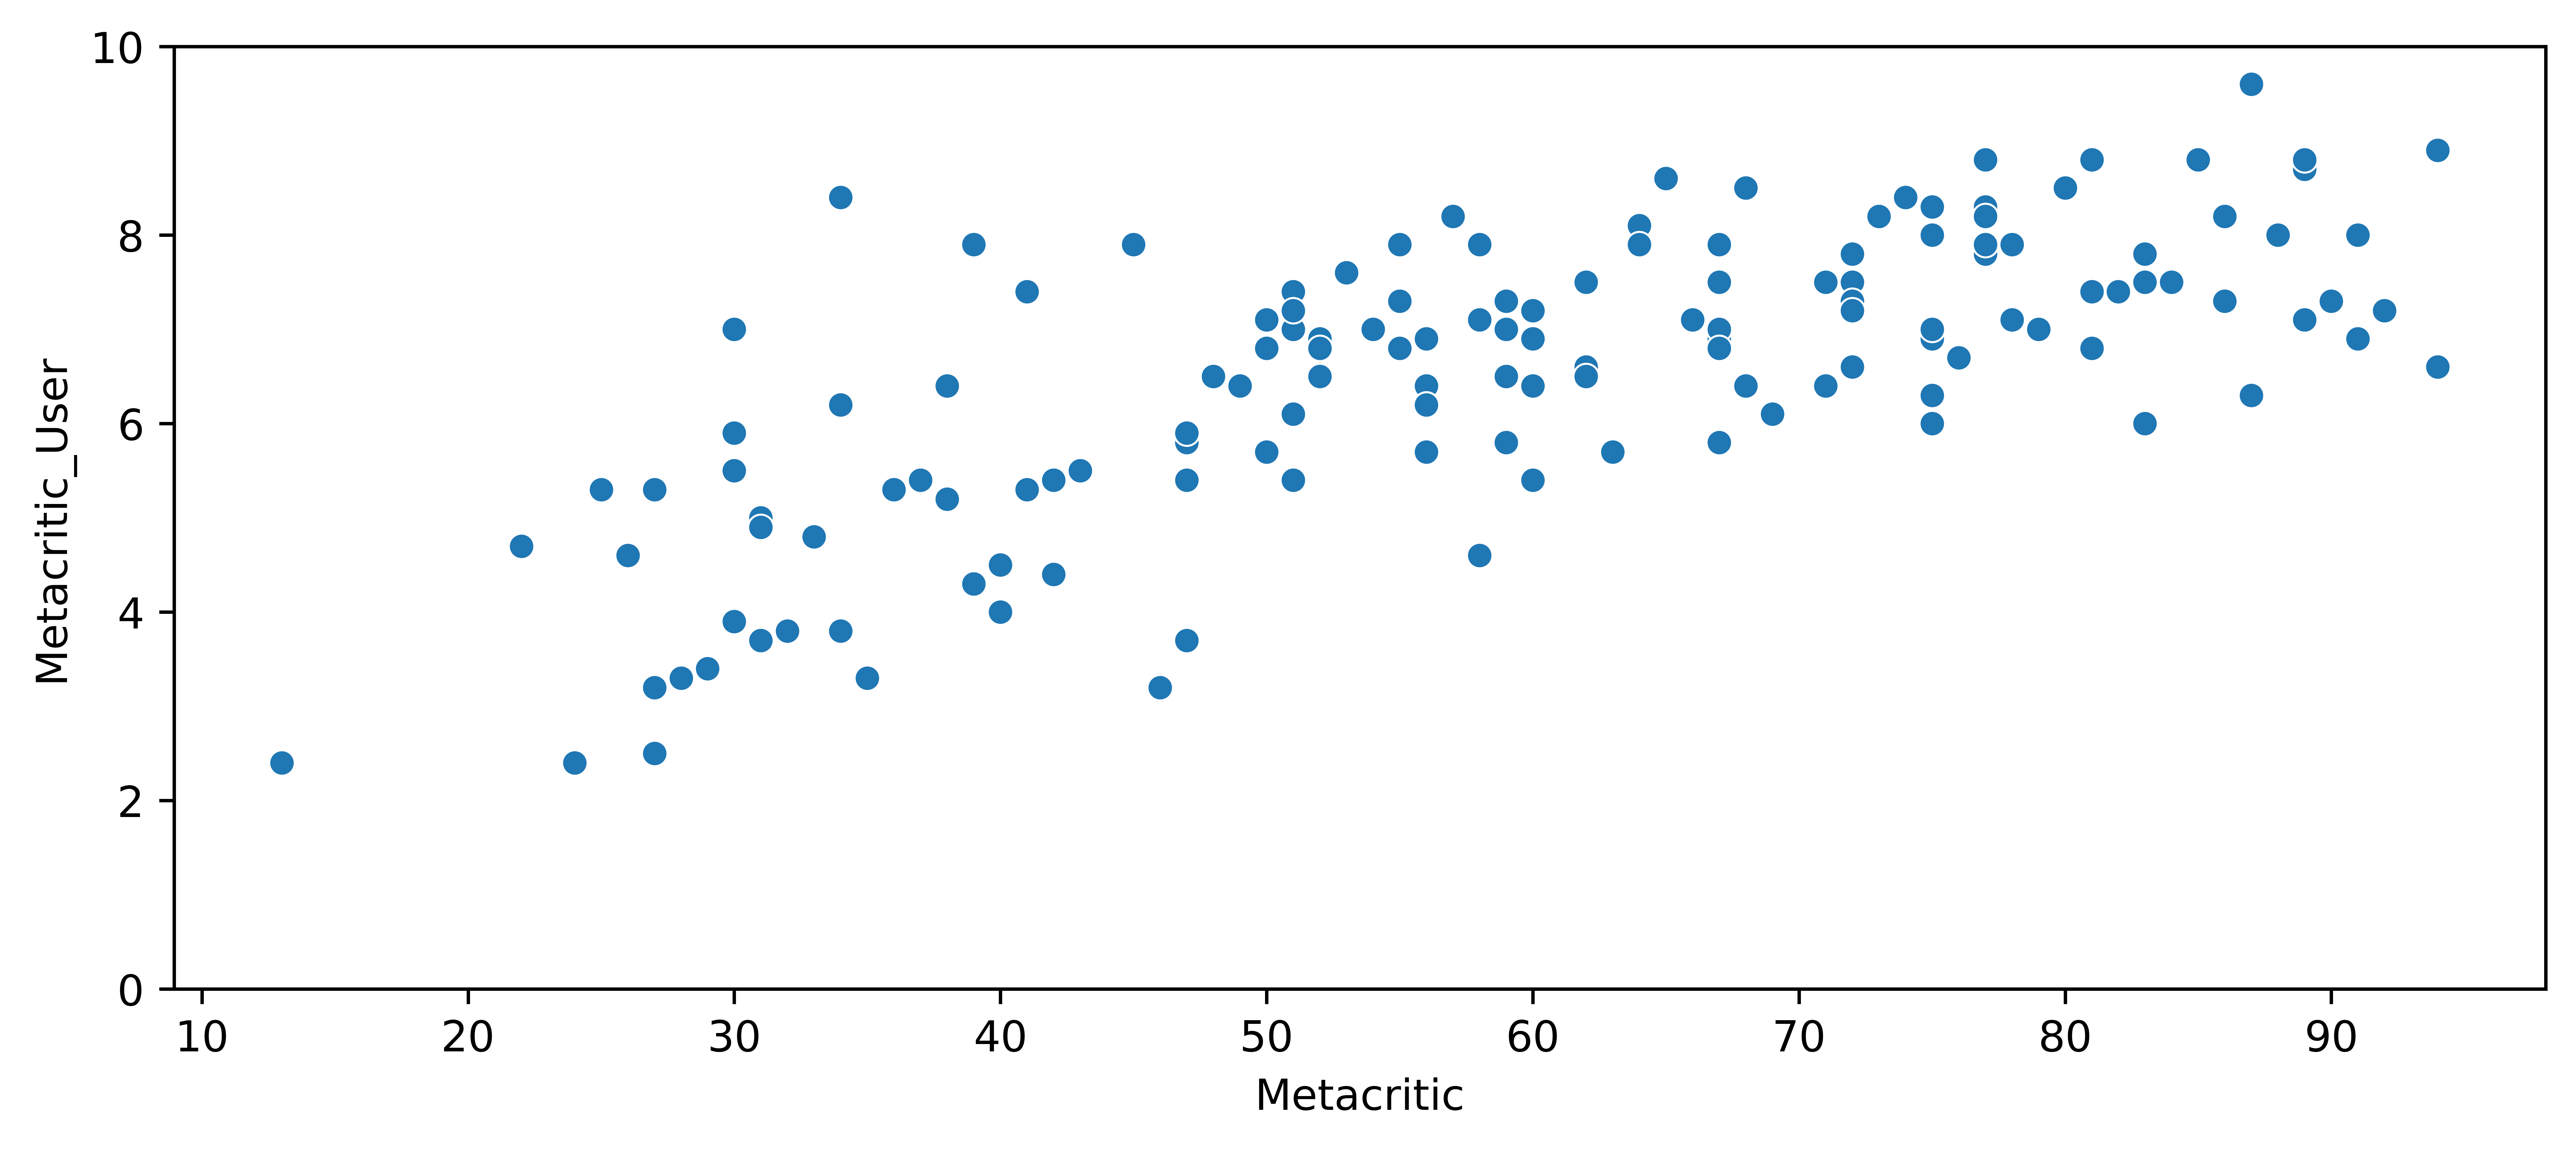

In [31]:
plt.figure(figsize=(10,4),dpi=1000)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)

## IMDB

Finally let's explore IMDB. Both Metacritic and IMDB report back vote counts.

**Plotting a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

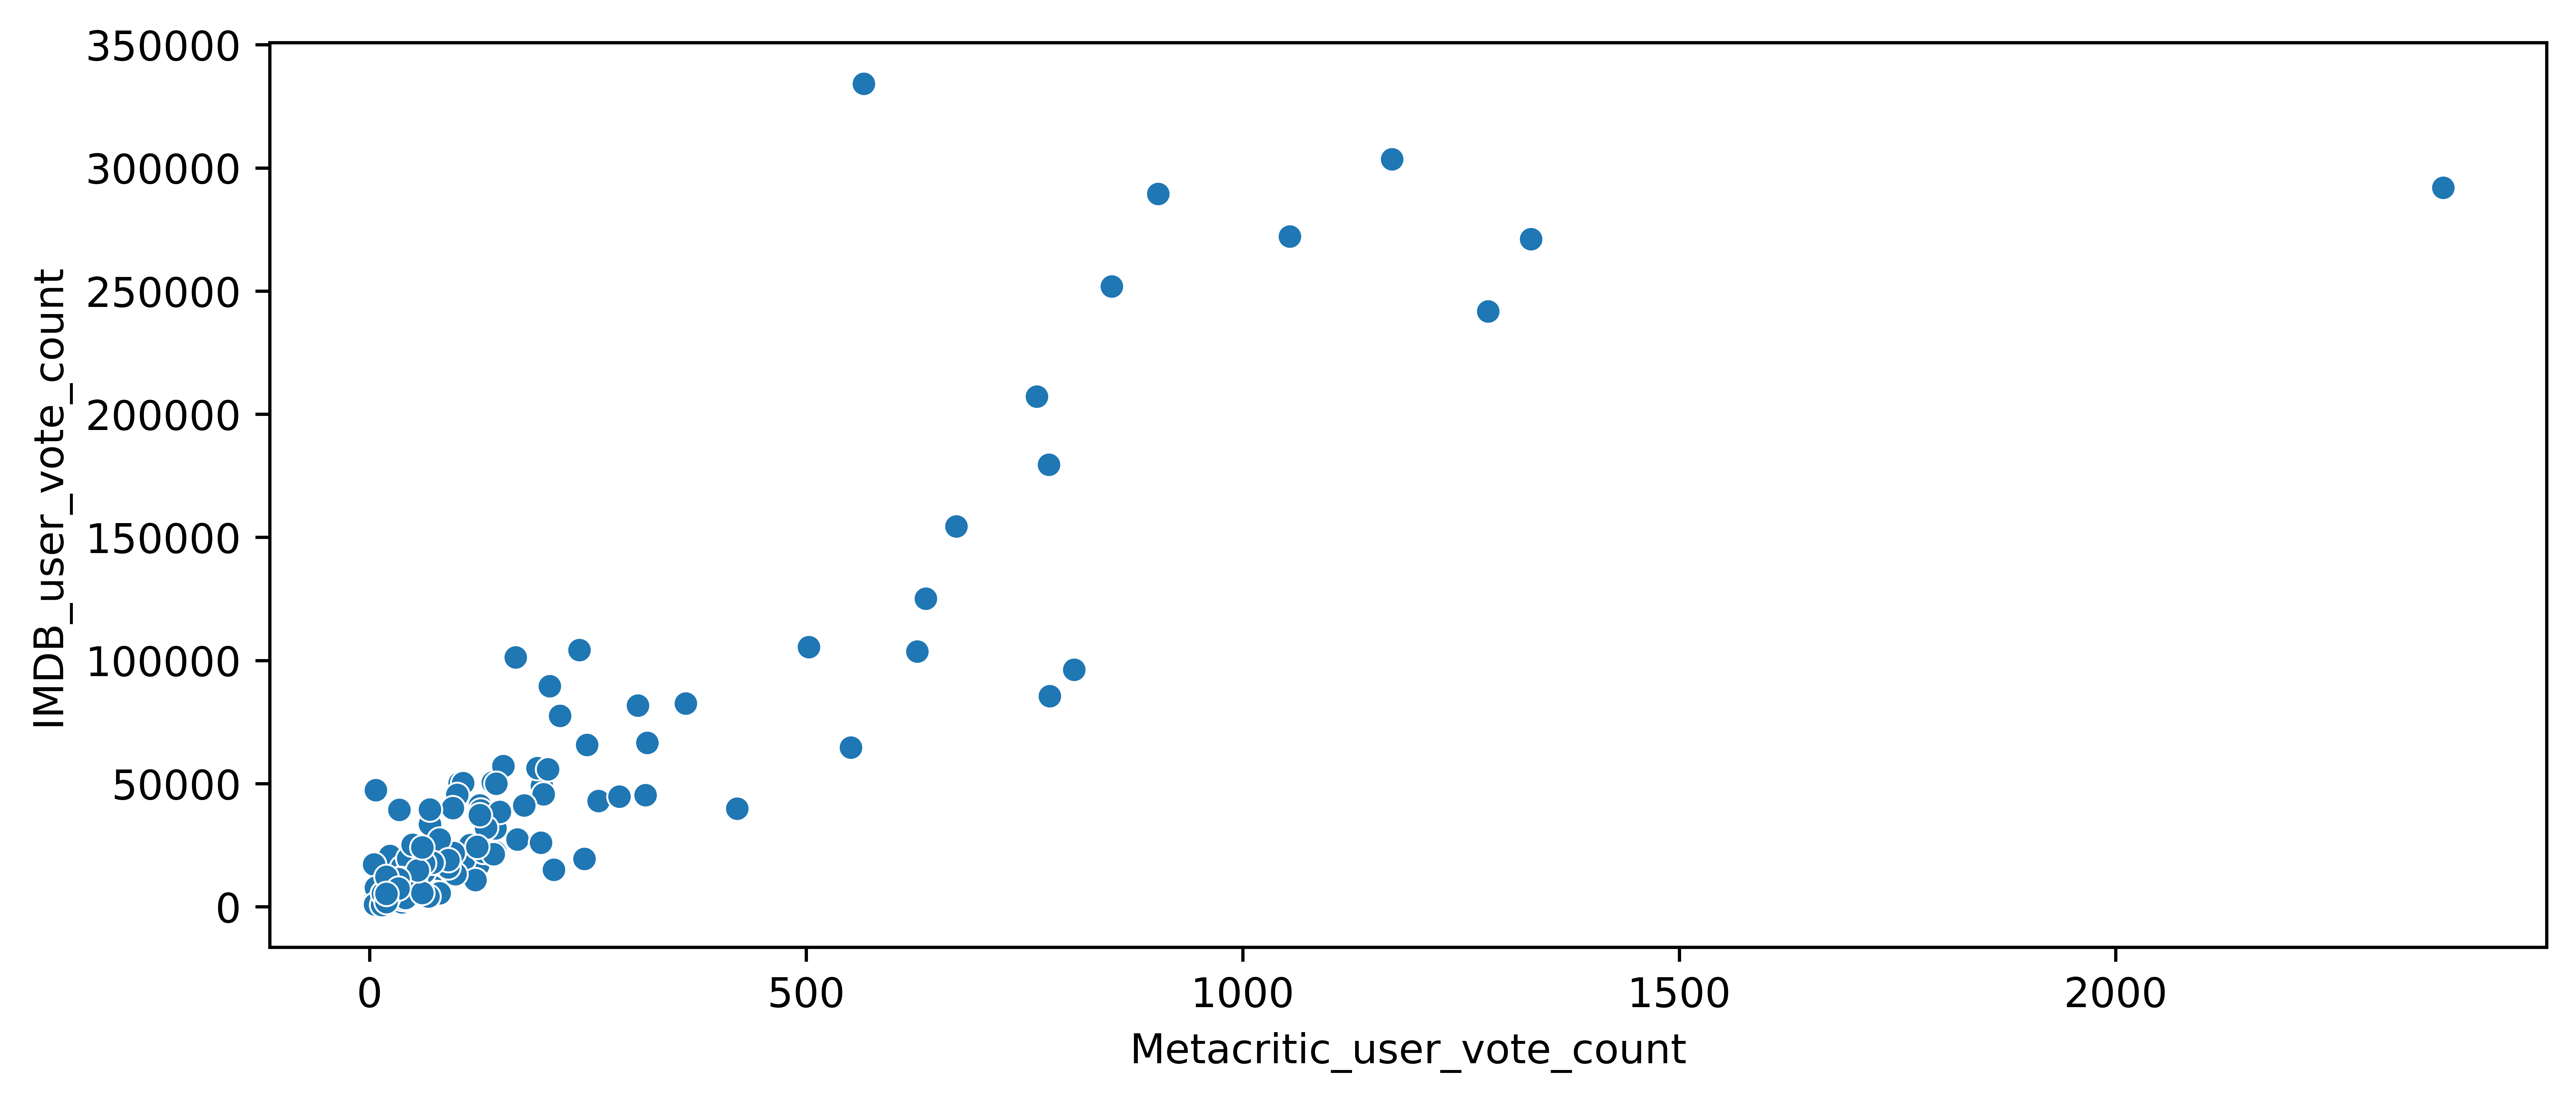

In [33]:
plt.figure(figsize=(10,4),dpi=1000)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [34]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

## Fandago Scores vs. All Sites

Analysing to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combining the Fandango Table with the All Sites table for ease of analysis.Not every movie in the Fandango table is in the All Sites table. We only want to compare movies that are in both DataFrames, so I did an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [35]:
Combined_scores=pd.merge(fan_reviewed,all_sites,how='inner',on='FILM')

In [36]:
Combined_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [37]:
Combined_scores.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


### Normalizing columns to Fandango STARS and RATINGS 0-5 

RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.


In [38]:
Combined_scores['MetaU_Norm']=Combined_scores['Metacritic_User']/2

In [39]:
Combined_scores['RT_Norm']=Combined_scores['RottenTomatoes']/20

In [40]:
Combined_scores['RTU_Norm']=Combined_scores['RottenTomatoes_User']/20

In [41]:
Combined_scores['Meta_Norm']=Combined_scores['Metacritic']/20

In [42]:
Combined_scores['IMDB_Norm']=Combined_scores['IMDB']/2

In [43]:
Combined_scores.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,MetaU_Norm,RT_Norm,RTU_Norm,Meta_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.60,1.25,2.10,2.30,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.50,3.55,4.05,2.95,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.30,3.60,4.25,3.60,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,3.40,4.05,4.20,3.35,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.45,4.90,4.50,4.70,4.30


In [44]:
Combined_norm=Combined_scores[['STARS','RATING','RT_Norm','MetaU_Norm','RTU_Norm','Meta_Norm','IMDB_Norm']]

In [45]:
Combined_norm=Combined_norm.round(1)

In [46]:
Combined_norm.head()

,STARS,RATING,RT_Norm,MetaU_Norm,RTU_Norm,Meta_Norm,IMDB_Norm
0,4.0,3.9,1.2,1.6,2.1,2.3,2.1
1,4.5,4.5,3.6,3.5,4.0,3.0,3.6
2,5.0,4.8,3.6,3.3,4.2,3.6,3.7
3,5.0,4.8,4.0,3.4,4.2,3.4,3.7
4,4.5,4.5,4.9,4.4,4.5,4.7,4.3


### Comparing Distribution of Scores Across Sites


Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**Creating a plot comparing the distributions of normalized ratings across all sites.**

In [47]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

/var/folders/2j/l_xbmzz11mngr8tgsh_ww_tr0000gn/T/ipykernel_19109/4108099431.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Combined_norm,shade='fill',clip=[0,5],ax=ax)
/var/folders/2j/l_xbmzz11mngr8tgsh_ww_tr0000gn/T/ipykernel_19109/191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


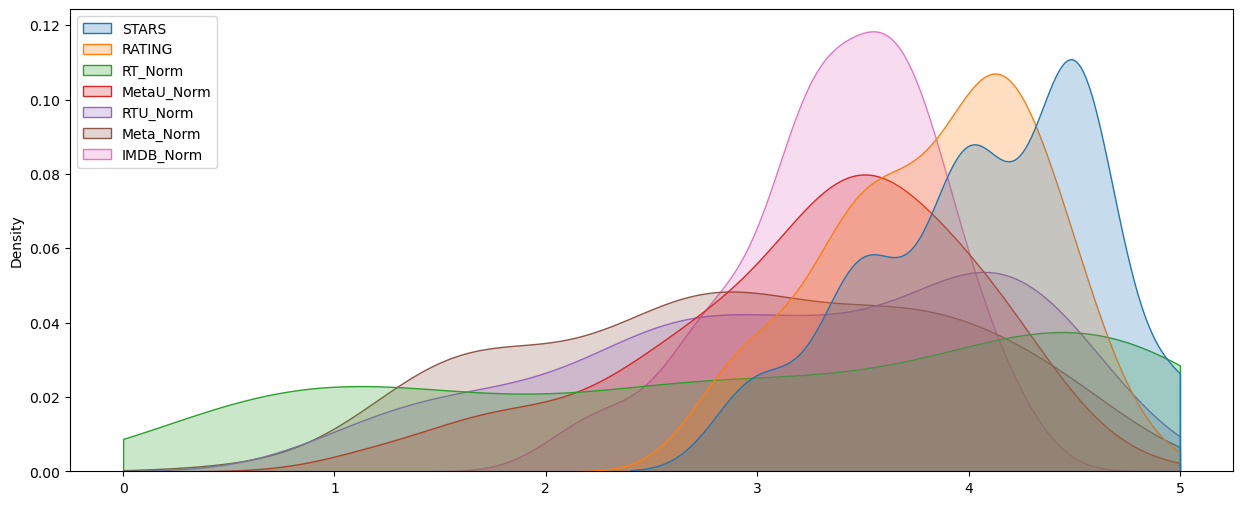

In [48]:
fig,ax =plt.subplots(figsize=(15,6),dpi=100)
sns.kdeplot(data=Combined_norm,shade='fill',clip=[0,5],ax=ax)
move_legend(ax, "upper left")

**Clearly Fandango's RATINGS(true) and STARS(displayed) both have higher ratings compared to other sites for the same movies and there unevenly distributed. RT critics have the most uniform distribution.** 

**Plotting a KDE plot that compares the distribution of RT critic ratings against the STARS displayed by Fandango.**

/var/folders/2j/l_xbmzz11mngr8tgsh_ww_tr0000gn/T/ipykernel_19109/191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


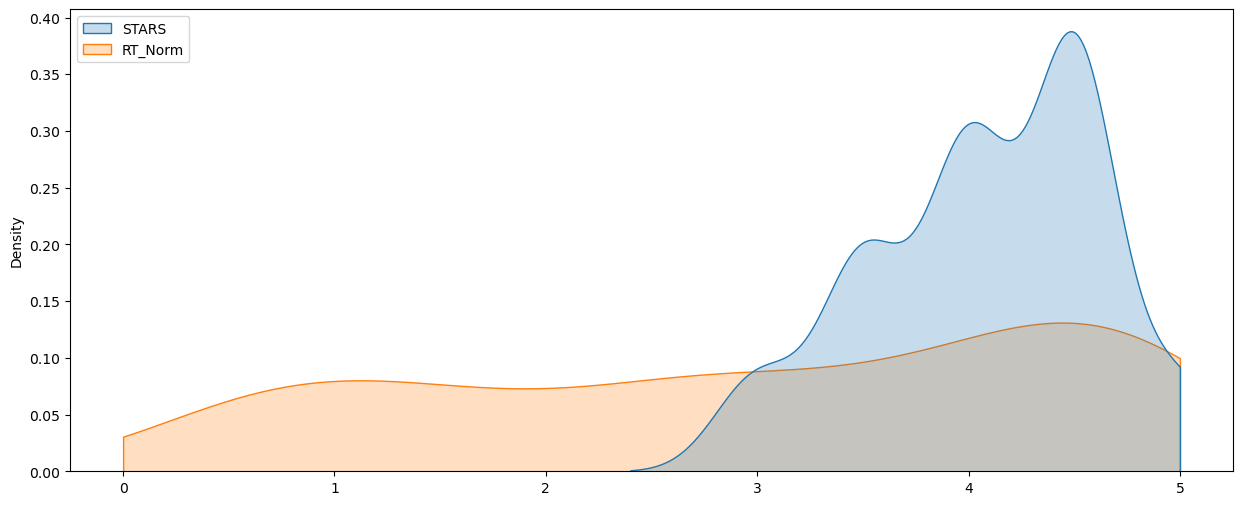

In [49]:
fig,ax =plt.subplots(figsize=(15,6),dpi=100)
sns.kdeplot(data=Combined_norm[['STARS','RT_Norm']],clip=[0,5],fill=True)
move_legend(ax, "upper left")

**Plotting a histplot comparing all normalized scores.**

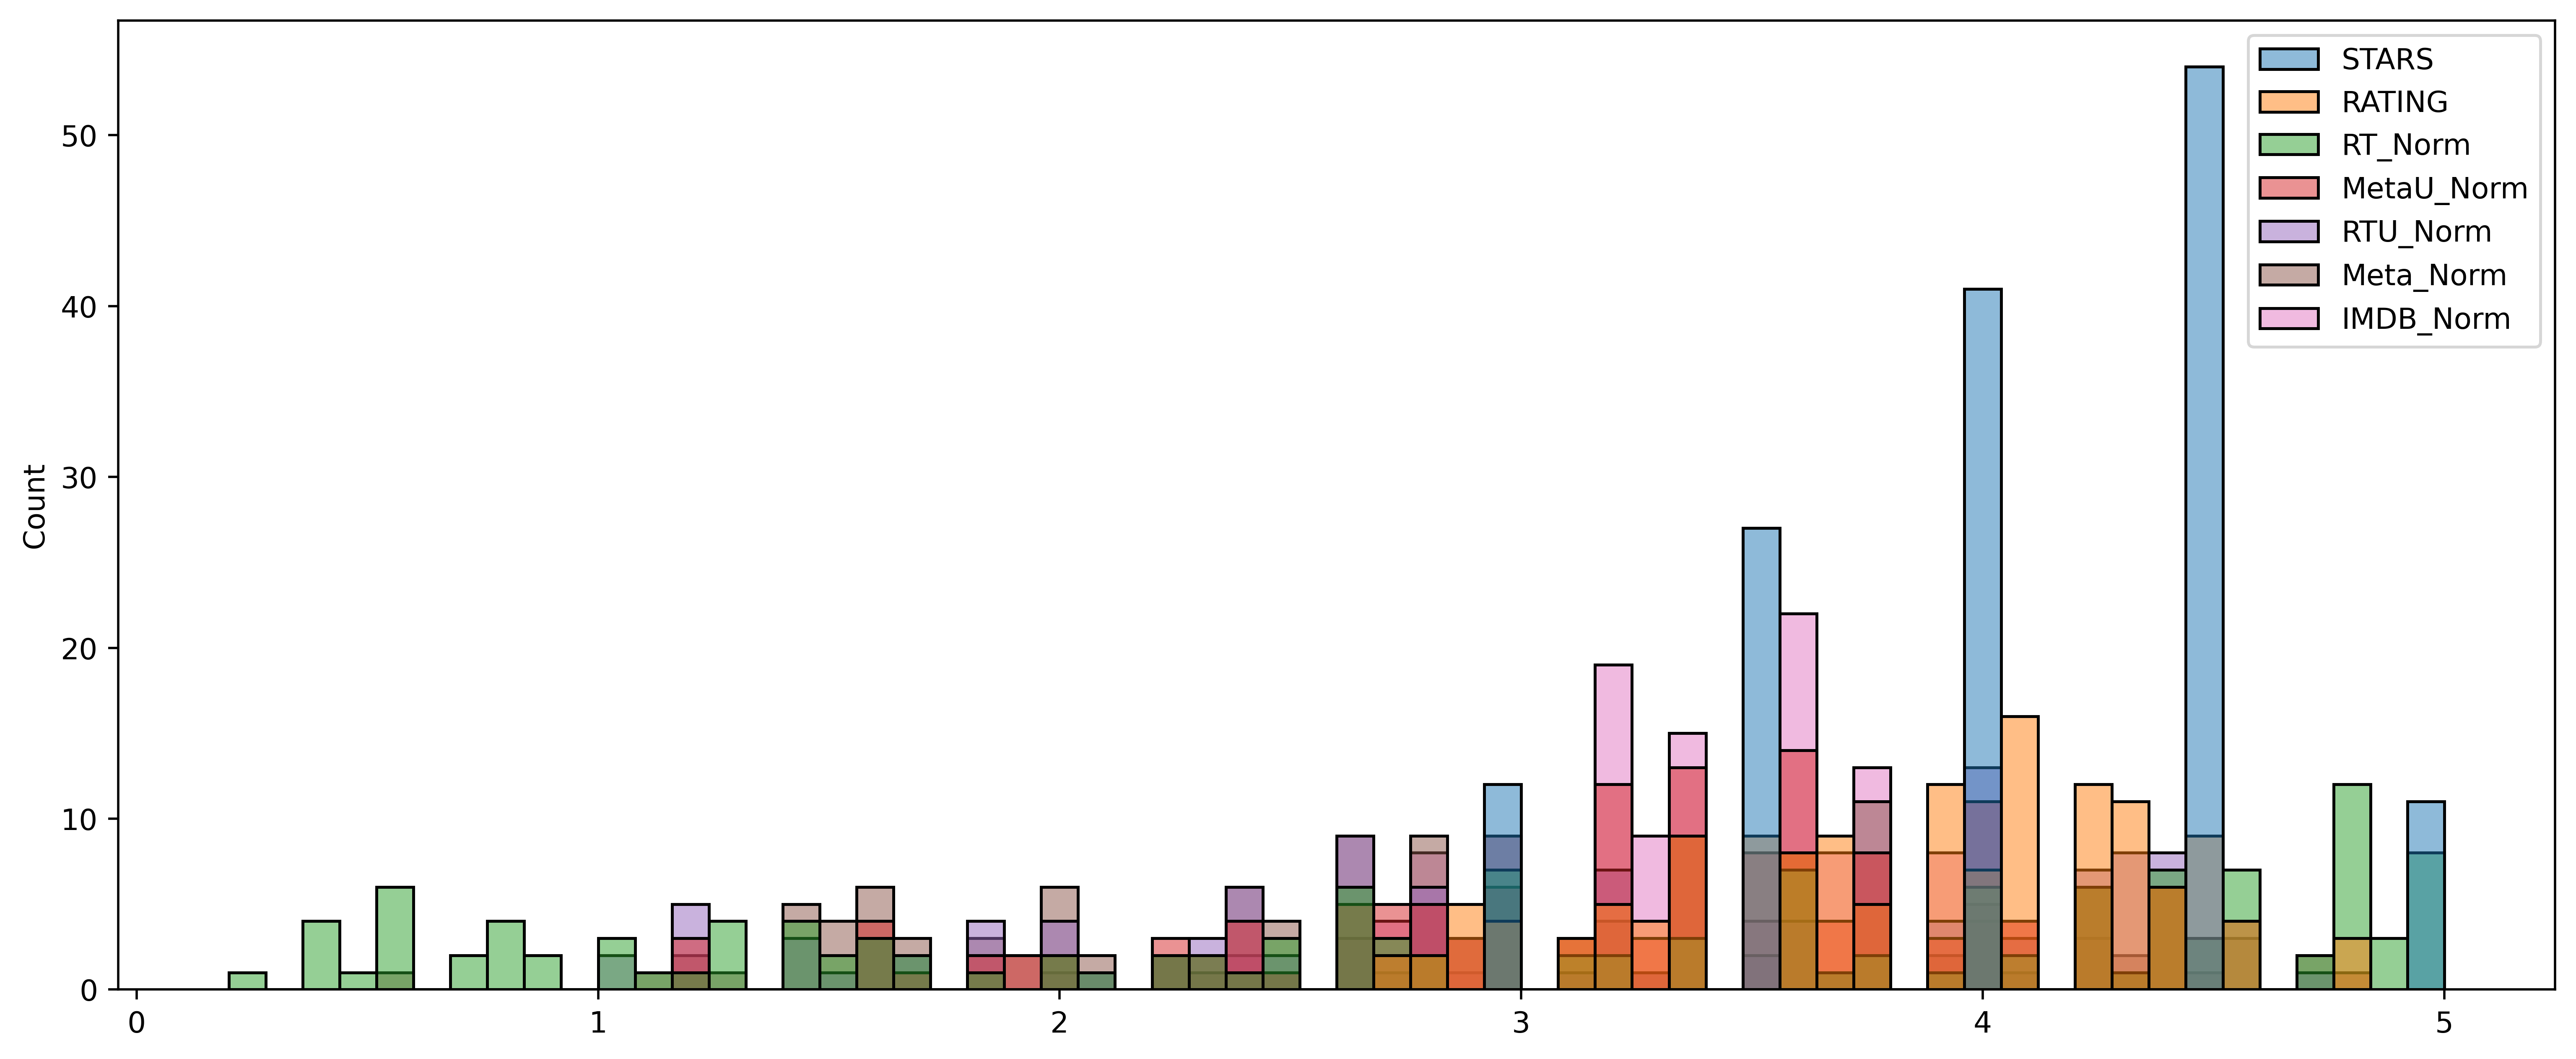

In [51]:
plt.subplots(figsize=(15,6),dpi=500)
sns.histplot(data=Combined_norm,bins=60);

**We can see from the above histplot that majority of the movies were rated high by Fandango**


### How are the worst movies rated across all platforms?


**Examining the top 10 worst movie based off the Rotten Tomatoes Critic Ratings**

In [52]:
Combined_norm['FILM']=Combined_scores['FILM']

In [53]:
x=Combined_norm.nsmallest(10,'RT_Norm')

In [54]:
x

,STARS,RATING,RT_Norm,MetaU_Norm,RTU_Norm,Meta_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.2,1.8,0.6,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,2.3,1.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.2,1.0,1.4,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.8,1.6,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,1.6,2.4,1.4,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,2.8,1.8,1.5,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,2.0,1.8,1.5,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.6,1.5,1.4,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,2.5,1.7,1.6,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.9,1.4,1.6,2.7,Unfinished Business (2015)


**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

<Axes: ylabel='Density'>

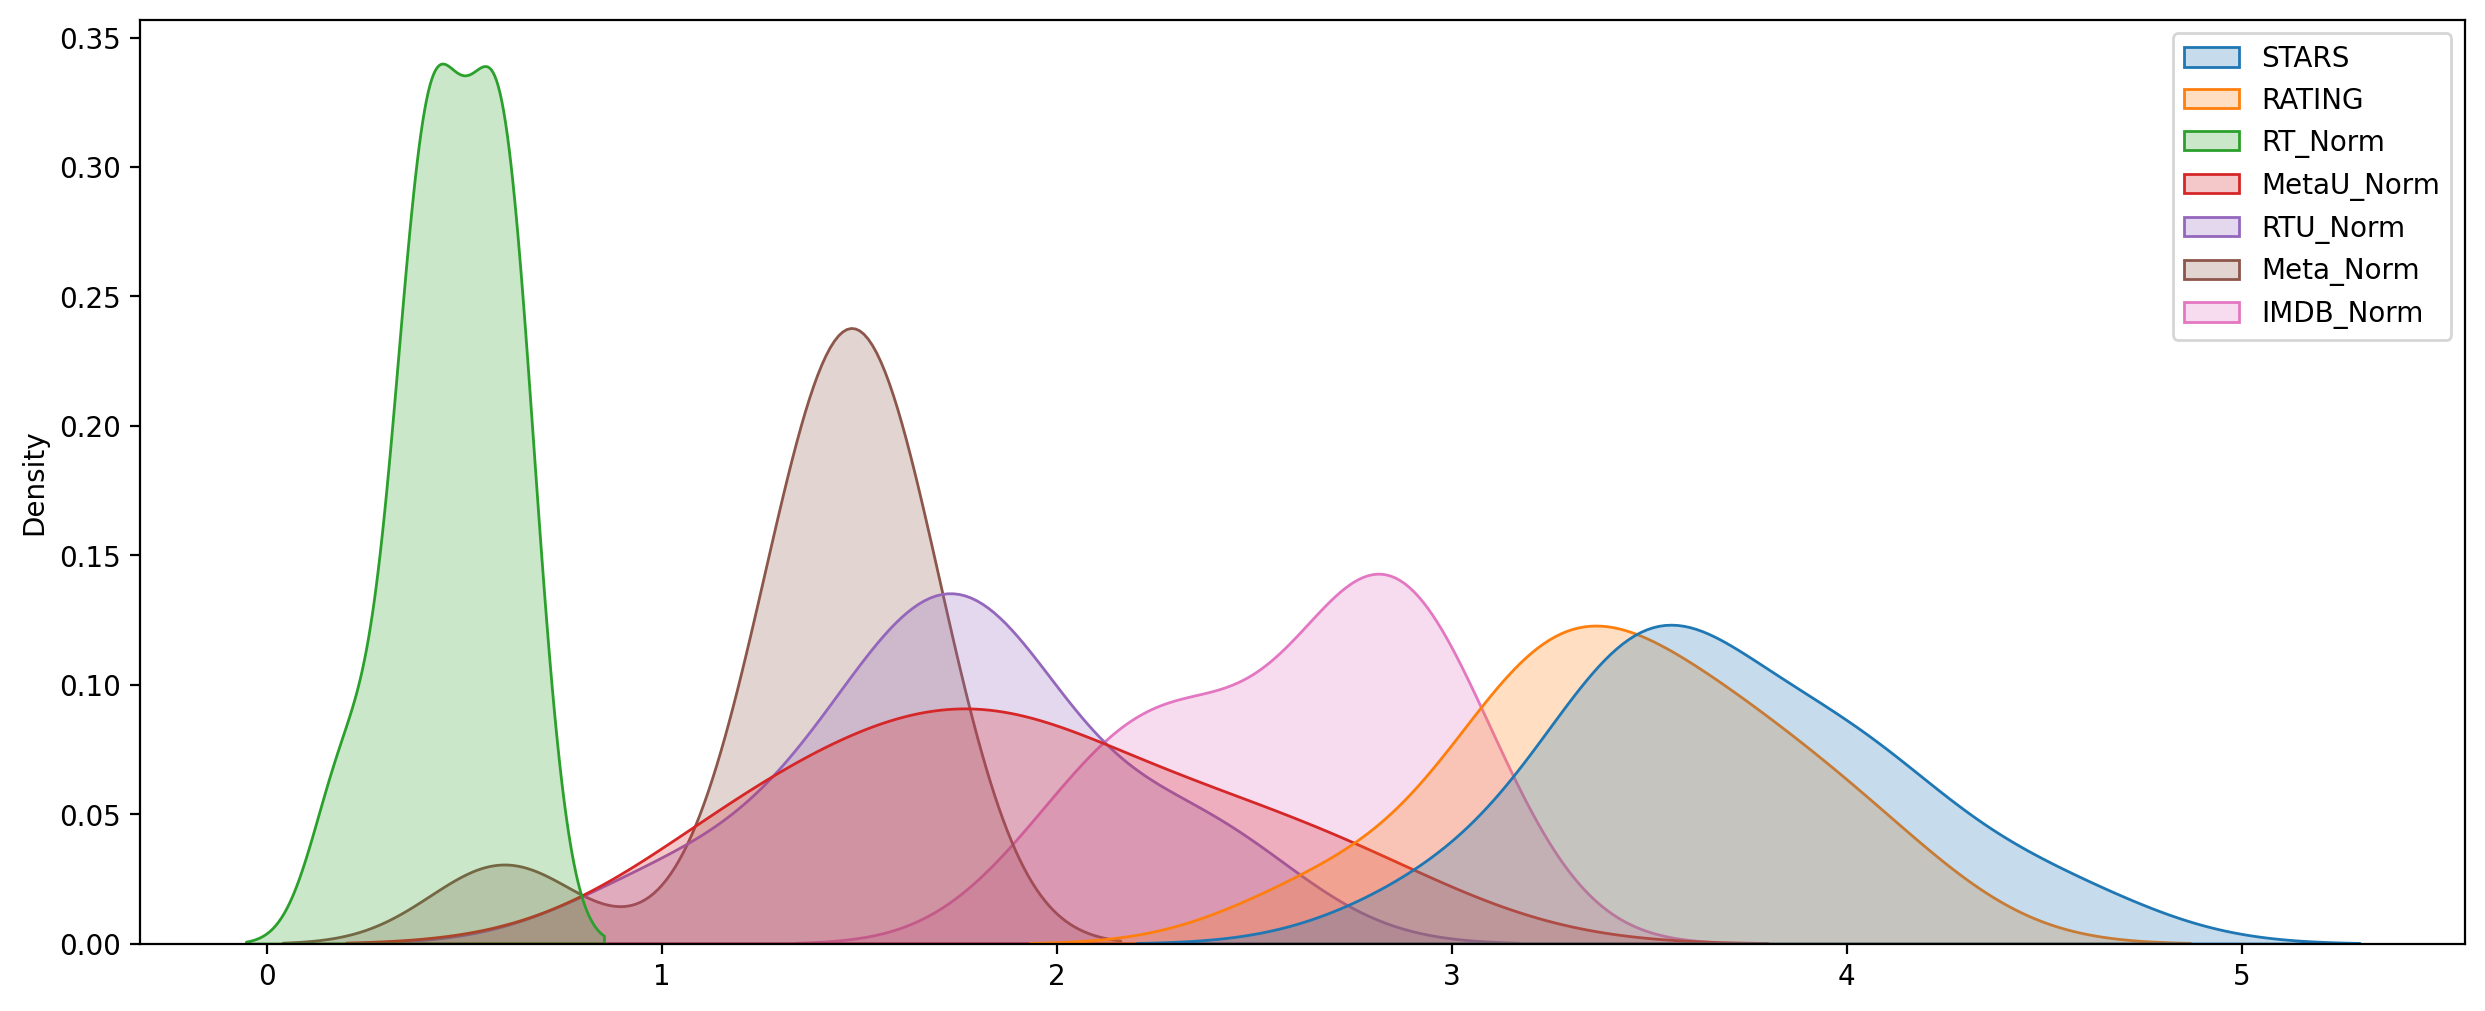

In [55]:
plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=x,fill=True)

## Conclusion

**we can clearly see from the plots and distribution Fandango was rating both the high rated movies as well as the worst movies higher than they were actually rated. My analysis stands true with what the site disclosed**